Load modules

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import datetime
from pathlib import Path
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#settings
plt.rc('font', size=14) 

Load data

In [2]:

path = Path(r'/Users/sr2/OneDrive - University College London/PhD/Research/'
        'Missions/SWARM/Non-Flight Data/Analysis/Apr-22/data/LSTM/')

file_name = str(path) + '/LSTM_51-feats.csv'
df = pd.read_csv(file_name)
df = df.drop(columns=['date'])
df.head(5).transpose()

,0,1,2,3,4
lat,0.490663,-7.529986e-02,1.128723e-01,0.139017,0.165121
long,-1.297054,-1.306930e+00,-1.716866e+00,-2.129635,-2.542287
mlt,20.059348,1.997858e+01,1.992607e+01,19.937049,20.033945
alt,486.821497,4.921414e+02,4.905873e+02,490.422942,490.143321
d_sin,0.309041,3.440169e-01,6.819047e-01,0.916785,0.999728
d_cos,0.951042,9.387576e-01,7.311046e-01,0.398745,0.000316
y_sin,0.512357,5.124442e-01,5.133828e-01,0.514346,0.515308
y_cos,0.858773,8.587205e-01,8.581597e-01,0.857583,0.857005
p_num,2838.000000,2.839000e+03,2.841000e+03,2843.000000,2845.000000
ne_min,93003.300000,9.784670e+04,5.322510e+04,47012.800000,41987.100000


Split and normalise the data

In [3]:
#split
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

print ('\n'.join([
    f'Train set size: {len(train_df)}',
    f'Val set size: {len(val_df)}',
    f'Test set size: {len(test_df)}',
    ]))

num_features = df.shape[1]

#norm
train_mean = train_df.mean()
train_std = train_df.std()

#Must always use train_mean & train_std so model cannot see any of these vals
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


Train set size: 1811
Val set size: 518
Test set size: 259


Visualise the distribution

(-10.0, 10.0)

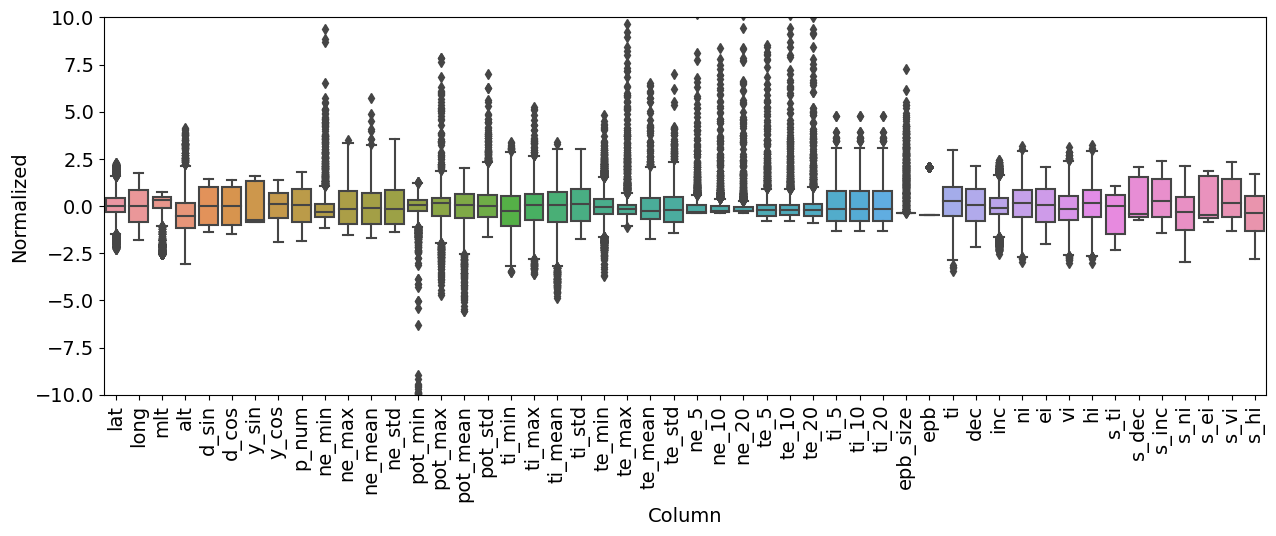

In [4]:

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(15, 5), dpi=100)
ax = sns.boxplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)
ax.set_ylim([-10, 10])

Data windowing

In [5]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [6]:
#shift = how many values into the future

feat_to_fore = 'epb_size'
w2 = WindowGenerator(input_width=64, label_width=1, shift=2,
                     label_columns=[feat_to_fore])
w2

Total window size: 66
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Label indices: [65]
Label column name(s): ['epb_size']

Split the data into a window of inputs (n) and labels (y)

In [7]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]

  labels = tf.stack([labels[:, :, self.column_indices[name]] 
      for name in self.label_columns],axis=-1)

  #Force update the shape of the tensor
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

#add to class
WindowGenerator.split_window = split_window

Create an example window and plot

All shapes are: ("batch" size, time (input width), # features)
Window shape: (3, 66, 50)
Inputs shape: (3, 64, 50)
Labels shape: (3, 1, 1)


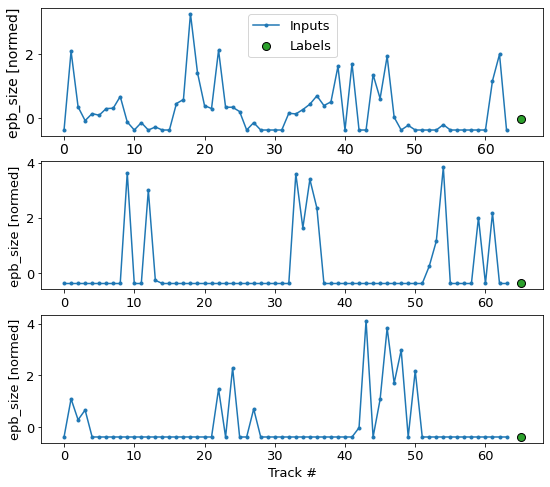

In [8]:
# Stack three slices, the length of the total window.
end_index = w2.total_window_size

#1000:1000 cannot exceed df.shape[0] aka the row length
example_window = tf.stack([np.array(train_df[:end_index]),
                           np.array(train_df[1000:1000+end_index]),
                           np.array(train_df[1700:1700+end_index])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: ("batch" size, time (input width), # features)')
print ('\n'.join([
    f'Window shape: {example_window.shape}',
    f'Inputs shape: {example_inputs.shape}',
    f'Labels shape: {example_labels.shape}',
    ]))

w2.example = example_inputs, example_labels

def plot(self, model=None, plot_col=feat_to_fore , max_subplots=3):
   
  inputs, labels = self.example
  plt.figure(figsize=(9, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue
    
    plt.rc('font', size=13) 
    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.rc('font', size=13) 
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Track #')

WindowGenerator.plot = plot
w2.plot()


Convert the data into a tensorflow time series

In [51]:
def make_dataset(self, data, batch_size=32):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=batch_size,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [52]:
#inspect the elements in the new dataset format
w2.test.element_spec

for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 64, 50)
Labels shape (batch, time, features): (32, 1, 1)


Create a window that can show you n amount of plots.

The new wide_window variable doesn't change the way the model operates. The model still makes predictions one hour into the future based on a single input time step. Here, the time axis acts like the batch axis: each prediction is made independently with no interaction between time steps:

In [53]:
#shift = how far into the future

plot_window = WindowGenerator(
    input_width=32, label_width=32, shift=1,
    label_columns=[feat_to_fore])

run_window = WindowGenerator(
    input_width=64, label_width=1, shift=1,
    label_columns=[feat_to_fore])


run the model

In [61]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  model.compile(
                loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  print(model.summary())

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

'''
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(8, return_sequences=True),
    tf.keras.layers.Dropout(rate = .3),
    tf.keras.layers.Dense(units=1)
])
'''

lstm_model = Sequential([
    LSTM(64, return_sequences=False),
    #LSTM(32, return_sequences=True),
    #LSTM(8, return_sequences=True),
    Dropout(rate = .3),
    Dense(units=1)
  
])

#print('Input shape:', run_window.example[0].shape)
#print('Output shape:', lstm_model(run_window.example[0]).shape)

#lstm_model(run_window.example[0]).shape

print(run_window.example[0].shape)

#history = compile_and_fit(lstm_model, run_window)
#IPython.display.clear_output()

(32, 64, 50)


InvalidArgumentError: Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

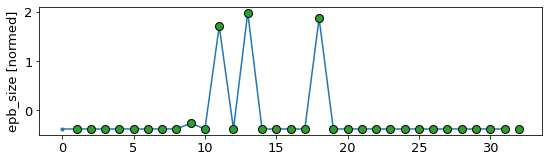

In [41]:
plot_window.plot(lstm_model)

Text(0, 0.5, 'loss')

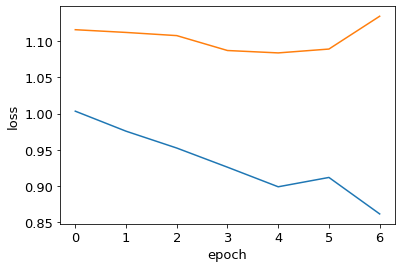

In [31]:
per = history.history
loss = per['loss']
mae = per['mean_absolute_error']
vloss = per['val_loss']
vmae = per['val_mean_absolute_error']

x = np.arange(len(loss))
sns.lineplot(x=x, y=loss)
sns.lineplot(x=x, y=vloss)

plt.xlabel('epoch')
plt.ylabel('loss')


Text(0, 0.5, 'mean sqaure error')

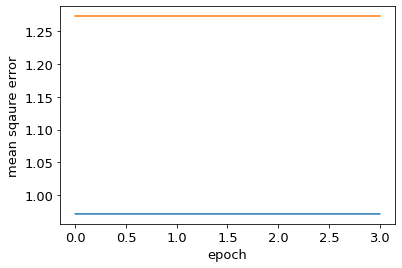

In [15]:
x = np.arange(len(loss))
sns.lineplot(x=x, y=mae)
sns.lineplot(x=x, y=vmae)

plt.xlabel('epoch')
plt.ylabel('mean sqaure error')

Shaply

In [16]:
import shap

background = train_df[:100].to_numpy()

#explainer = shap.DeepExplainer(lstm_model, background)

print(lstm_model)

print(lstm_model.layers[0])

#explainer = shap.DeepExplainer((lstm_model.layers[0].input, lstm_model.layers[-1].output), background)

#print(train_df)

IndexError: list index out of range